# Prediction using GPR data

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import fiona
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
path='/Users/paw_paw/Library/Mobile Documents/com~apple~CloudDocs/学习/PC5287_M.SC Coursework Thesis for Physics And Technology/data set'

$$
\langle T_{ij} \rangle = T_i\cdot \frac{m_i\cdot n_j}{(m_i+s_{ij})(m_i+n_j+s_{ij})}
$$
in which:
$$
T_i=\sum_{j\neq i}T_{ij}
$$
and $\langle T_{ij} \rangle$ means tha mean value of $T_{ij}$ within a period of time. 

## Import population flux data

In [3]:
T_ij=pd.read_csv(path+'/Total_flux_ij_2019.csv',index_col='PA_name')
T_i=pd.read_csv(path+'/Total_flux_2019.csv',index_col='PA_name')

In [4]:
T_i.mask(T_i==0,np.nan,inplace=True)
T_i

,TOTAL
PA_name,
BUKIT MERAH,4642727.0
BUKIT PANJANG,2033139.0
BUKIT TIMAH,2549690.0
CENTRAL WATER CATCHMENT,158283.0
CHANGI,1469018.0
CHOA CHU KANG,2876370.0
CLEMENTI,2977016.0
HOUGANG,4014841.0
JURONG EAST,2061562.0


## import the geometry data 

In [6]:
#read KML file
fiona.supported_drivers['KML'] = 'rw'

pa = gpd.read_file(path+'/master-plan-2019-planning-area-boundary-no-sea/planning-boundary-area.kml', \
                            driver='KML')
pa = pa.to_crs(3414)

def extract_desc_pa(desc_pa):
    return desc_pa.split('PLN_AREA_N')[1].split('<td>')[1].split('<')[0]

pa['PLN_AREA_N'] = pa.Description.apply(extract_desc_pa)

pa['centroid'] = pa.centroid

<AxesSubplot: >

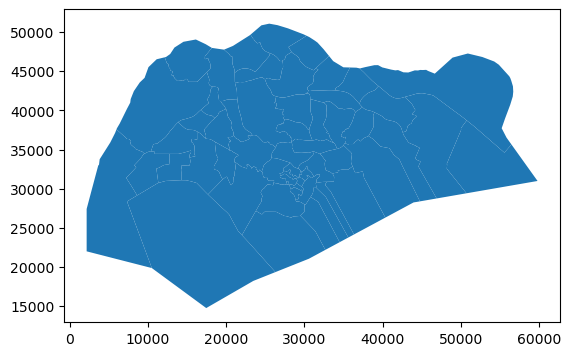

In [7]:
pa.plot()

## import population (GPR) data 

In [8]:
GPR = gpd.read_file(path+'/SG_GPR_sorted.geojson')

<AxesSubplot: >

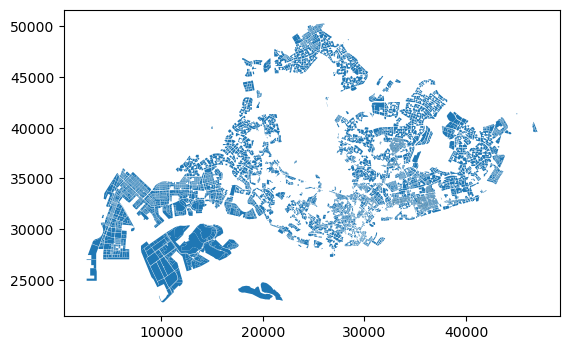

In [9]:
GPR.plot()

In [10]:
GPR.size

298053

In [9]:
Pop_dens = pd.read_csv(path+'/GPR_pop.csv')

In [10]:
Pop_dens['TOTAL']=Pop_dens['BUSINESS']+Pop_dens['COMMERCIAL']+Pop_dens['RESIDENTIAL']

In [11]:
pd.concat([Pop_dens.PLN_AREA_N,pa.PLN_AREA_N]).drop_duplicates(keep = False).reset_index().drop(columns='index')

,PLN_AREA_N
0,CENTRAL WATER CATCHMENT
1,LIM CHU KANG
2,NORTH-EASTERN ISLANDS
3,SIMPANG
4,SOUTHERN ISLANDS
5,MARINA EAST
6,CHANGI BAY


In [38]:
# fill the missing data with 0
temp = pd.concat([Pop_dens.PLN_AREA_N,pa.PLN_AREA_N]).drop_duplicates(keep = False).\
    reset_index().drop(columns='index')

temp['TOTAL']= np.zeros(temp.shape[0])
temp['BUSINESS']= np.zeros(temp.shape[0])
temp['COMMERCIAL']= np.zeros(temp.shape[0])
temp['RESIDENTIAL']= np.zeros(temp.shape[0])

Pop_dens=pd.concat([Pop_dens,temp]).reset_index().drop(columns='index')

Pop_dens.shape

(55, 5)

In [39]:
Pop_dens

,PLN_AREA_N,BUSINESS,COMMERCIAL,RESIDENTIAL,TOTAL
0,TUAS,2.675359e+07,0.000000e+00,0.000000e+00,2.675359e+07
1,PIONEER,1.315212e+07,0.000000e+00,0.000000e+00,1.315212e+07
2,WESTERN ISLANDS,3.342372e+07,0.000000e+00,0.000000e+00,3.342372e+07
3,JURONG WEST,5.584135e+06,0.000000e+00,1.245918e+07,1.804332e+07
4,BOON LAY,1.032779e+07,0.000000e+00,0.000000e+00,1.032779e+07
5,JURONG EAST,1.011655e+07,2.188062e+05,6.565854e+06,1.690121e+07
6,WESTERN WATER CATCHMENT,2.506920e+04,0.000000e+00,0.000000e+00,2.506920e+04
7,TENGAH,0.000000e+00,0.000000e+00,5.644710e+06,5.644710e+06
8,CHOA CHU KANG,0.000000e+00,5.032494e+04,8.567807e+06,8.618132e+06
9,BUKIT BATOK,9.903020e+05,1.512479e+03,8.936423e+06,9.928237e+06


### define the function to calculate the $s_{ij}$ value

In [27]:
GPR['centroid']=GPR.centroid

GPR['centroids'] = GPR['centroid'].apply(lambda x: x.wkt).values

GPR_centroid_pop = GPR.set_index(['centroids'])['POP_DENS'].to_dict()

In [151]:
pa_centroid=pa.set_index(['PLN_AREA_N'])['centroid'].to_dict()

In [158]:
gpr_ctr = shapely.wkt.loads(list(GPR_centroid_pop.keys())[0]) 
# define the function to generate s_ij
def s_ij(pa_i, pa_j):
    r_ij = pa_centroid.get(pa_i).distance(pa_centroid.get(pa_j))
    s_ij = 0 
    for k in list(GPR_centroid_pop.keys()):
        if shapely.wkt.loads(k).distance(pa_centroid.get(pa_j))<=r_ij:
            s_ij = s_ij + GPR_centroid_pop.get(k)
    return s_ij 

In [ ]:
#test s_ij
s_ij('NEWTON','TANGLIN')

In [153]:
s=T_ij.copy().mask(T_ij!=np.nan)

In [139]:
s.index.name='pa_i'
s.columns.name='pa_j'

In [164]:
for i in s.index:
    for j in s.columns:
        s.at[i,j]=s_ij(i,j)

In [244]:
s.to_csv(path+'s_ij.csv')

## Prediction

We can see that GPR, bus and MRT flux data all have missing data more or less.    By looking into the background of these planning areas, we can find that they are all places that lack residents. 

In [229]:
# construct the Pridiction chart 
Prediction = T_ij.copy()

In [230]:
Prediction.mask(Prediction!=np.nan,inplace=True)

In [231]:
T_i_dict=T_i.to_dict()['TOTAL']

def get_T_i(pa): # get the total outward flux 
    return T_i_dict.get(pa)

In [232]:
pop_dict=Pop_dens.set_index(['PLN_AREA_N'])['TOTAL'].to_dict()
def get_pop(pa): # get the population of a planning area 
    return pop_dict.get(pa)

In [233]:
# define the prediction function 
def func(pa_i, pa_j):
    if get_T_i(pa_i)!=np.nan:
        try:
            return get_T_i(pa_i)*get_pop(pa_i)*get_pop(pa_j)/\
        ((get_pop(pa_i)+s.at[pa_i,pa_j])\
         *(get_pop(pa_i)+get_pop(pa_j)+s.at[pa_i,pa_j]))
        except ZeroDivisionError: 
            return np.nan 

In [234]:
for pa_i in Prediction.index:
    Prediction[pa_i]=Prediction.index.to_series().apply(func,args=([pa_i]))    

In [235]:
# output the result 
Prediction

,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,JURONG WEST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
PA_name,,,,,,,,,,,,,,,,,,,,,
BUKIT MERAH,2.321364e+06,5.655623e+03,1.874918e+04,0.0,1731.126376,5.626075e+03,2.438049e+04,1.352634e+04,2.386881e+04,1.692776e+04,...,33634.796828,66909.723815,0.0,13184.902804,1.762306e+04,3124.659834,106643.326802,16.364643,7.395142e+03,5.404626e+03
BUKIT PANJANG,4.963356e+03,1.016570e+06,5.503904e+04,0.0,339.109446,8.919591e+04,2.580876e+04,3.423482e+03,1.580871e+04,1.449506e+04,...,554.200261,259.357114,0.0,787.909687,3.082631e+03,711.998162,9184.487829,29.864581,3.875932e+04,1.043565e+04
BUKIT TIMAH,2.113491e+04,5.230199e+04,1.274845e+06,0.0,378.004665,1.439899e+04,7.929520e+04,3.711028e+03,1.831217e+04,9.216219e+03,...,1660.555514,757.676872,0.0,924.707399,3.482222e+03,775.049648,15470.189586,13.251190,1.273794e+04,5.815295e+03
CENTRAL WATER CATCHMENT,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
CHANGI,1.597636e+02,9.020274e+01,6.559617e+01,0.0,734509.000000,1.166865e+02,1.347068e+02,7.365840e+02,2.250355e+02,2.396423e+02,...,23.648312,44.195522,0.0,304.931215,6.921414e+02,290.007712,429.496820,0.346064,2.180232e+02,2.299677e+02
CHOA CHU KANG,3.482422e+03,1.707600e+05,7.154147e+03,0.0,446.918262,1.438185e+06,1.623494e+04,4.245826e+03,2.254435e+04,4.039011e+04,...,382.871888,266.939743,0.0,947.479227,3.700459e+03,908.293352,14294.140152,393.320715,7.732715e+04,1.198926e+04
CLEMENTI,2.858492e+04,5.942919e+04,1.998164e+05,0.0,625.971920,3.272651e+04,1.488508e+06,5.438696e+03,3.165828e+05,4.734651e+04,...,1854.590697,1061.622089,0.0,1853.976937,6.367944e+03,1198.241081,120579.985944,48.973395,1.657913e+04,5.280805e+03
HOUGANG,1.865457e+04,5.535418e+03,4.934113e+03,0.0,10454.988984,6.009501e+03,6.194427e+03,2.007420e+06,9.068058e+03,9.465582e+03,...,3656.301079,3226.339875,0.0,13284.517263,1.346569e+05,185204.338959,20016.042539,14.396624,3.068849e+04,5.926085e+04
JURONG EAST,1.474171e+04,2.874314e+04,1.969569e+04,0.0,530.615584,3.017838e+04,2.093792e+05,4.754690e+03,1.030781e+06,1.159053e+05,...,1010.403035,670.183057,0.0,1593.617304,5.045753e+03,1029.726524,178711.861949,72.744169,1.189894e+04,3.501041e+03


In [246]:
Prediction.to_csv(path+'/Prediction2019_gpr.csv')

In [247]:
Prediction.isna().sum().sum()

443

In [248]:
T_ij.isna().sum().sum()

1253